In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [36]:
# Files upload

from google.colab import files
upload = files.upload()

Saving metrics.csv to metrics.csv


In [91]:
# Read dataframe
# Download: https://www.kaggle.com/nhs/tobacco-use?select=metrics.csv

df = pd.read_csv("/content/metrics.csv")
df.head()

,Year,Tobacco Price\nIndex,Retail Prices\nIndex,Tobacco Price Index Relative to Retail Price Index,Real Households' Disposable Income,Affordability of Tobacco Index,Household Expenditure on Tobacco,Household Expenditure Total,Expenditure on Tobacco as a Percentage of Expenditure
0,2015,1294.3,386.7,334.7,196.4,58.7,19252.0,1152387.0,1.7
1,2014,1226.0,383.0,320.1,190.0,59.4,19411.0,1118992.0,1.7
2,2013,1139.3,374.2,304.5,190.3,62.5,18683.0,1073106.0,1.7
3,2012,1057.8,363.1,291.3,192.9,66.2,18702.0,1029378.0,1.8
4,2011,974.9,351.9,277.1,189.3,68.3,18217.0,990828.0,1.8


In [38]:
# Split dataframe

train_df = df[:(int((len(df) * 0.8)))]
test_df = df[(int((len(df) * 0.8))):]

print("Train data:", int(len(train_df)), "entries")
print("Test data:", int(len(test_df)), "entries")
print("Total:", int(len(df)), "entries")

Train data: 28 entries
Test data: 8 entries
Total: 36 entries


In [41]:
# Set x-axis and y-axis

x_axis = "Year"
y_axis = "Tobacco Price\nIndex"

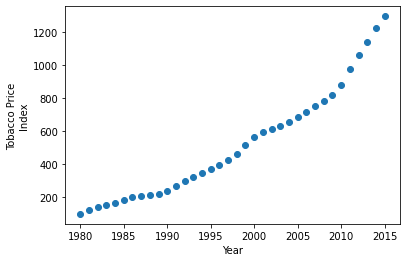


Average: 520.7444444444443


In [42]:
# Visualize data into plot graph

plt.scatter(df[x_axis], df[y_axis])
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

print("\nAverage:", df[y_axis].mean())

In [68]:
# Linear Regression function

def linear_regression(input, output):
  xi = input
  yi = output
  n = len(xi)

  sum_yixi = (yi * xi).sum()
  yixi_by_n = (yi.sum() * xi.sum()) / n

  sum_xixi = (xi * xi).sum()
  xixi_by_n = (xi.sum() * xi.sum()) / n

  slope = (sum_yixi - yixi_by_n) / (sum_xixi - xixi_by_n)
  intercept = yi.mean() - slope * xi.mean()

  return (slope, intercept)

In [83]:
# Slope and intercept

df_slope, df_intercept = linear_regression(train_df[x_axis], train_df[y_axis])

print("Intercept =", df_intercept)
print("Slope =", df_slope)
print("y =", df_slope, "* x +", df_intercept)

Intercept = -73366.32772304487
Slope = 36.96735084838615
y = 36.96735084838615 * x + -73366.32772304487


Text(0, 0.5, 'Tobacco Price\nIndex')

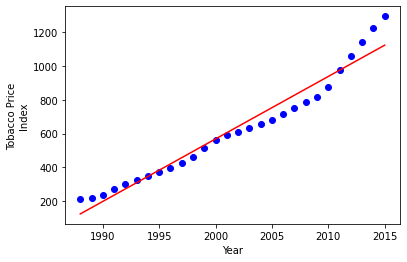

In [49]:
# Plot the line

plt.scatter(train_df[x_axis], train_df[y_axis], color="blue")
plt.plot(train_df[x_axis], df_slope * (train_df[x_axis]) + df_intercept, "-r")
plt.xlabel(x_axis)
plt.ylabel(y_axis)

In [79]:
# Regression prediction function

def get_regression_prediction(input, slope, intercept):
  return input * slope + intercept

In [80]:
# Inverse regression prediction function

def get_inverse_regression_prediction(output, slope, intercept):
  return (output - intercept) / slope

In [81]:
# Get prediction and inverse prediction

x_value = 2020
estimated_y_value = get_regression_prediction(x_value, df_slope, df_intercept)
y_value = estimated_y_value
estimated_x_value = get_inverse_regression_prediction(y_value, df_slope, df_intercept)

print("Estimated y value:", estimated_y_value)
print("Estimated x value:", estimated_x_value)

Estimated y value: 1307.7209906951466
Estimated x value: 2020.0


In [84]:
# Residual Sum of Squares

def residual_sum_of_squares(input, output, slope, intercept):
  prediction = input * slope + intercept
  residual = output - prediction
  rss = (residual ** 2).sum()

  return rss

In [85]:
# R-Squared

def r_squared(input, output, slope, intercept):
  prediction = input * slope + intercept
  residual = output - prediction
  res = (residual ** 2).sum()
  rest = output - output.mean()
  tot = (rest ** 2).sum()

  return (1 - res/tot)

In [86]:
# Mean Absolute Error

def mean_absolute_error(input, output, slope, intercept):
  prediction = input * slope + intercept
  yi = output
  var = (yi - prediction).abs().sum()
  mae = var / len(yi)

  return mae

In [88]:
# Mean Squared Error

def mean_squared_error(input, output, slope, intercept):
  prediction = input * slope + intercept
  yi = output
  var = ((yi - prediction) ** 2).sum()
  mse = var / len(yi)

  return mse

In [89]:
# Mean Absolute Percentage Error

def mean_absolute_percentage_error(input, output, slope, intercept):
  prediction = input * slope + intercept
  yi = output
  var = ((yi - prediction) / yi).abs().sum()
  mape = var / len(yi) * 100

  return mape

In [90]:
# Mean Percentage Error

def mean_percentage_error(input, output, slope, intercept):
  prediction = input * slope + intercept
  yi = output
  var = ((yi - prediction) / yi).sum()
  mpe = var / len(yi) * 100

  return mpe

In [94]:
# Calculate the error/accuracy

print("RSS (tes)  :", residual_sum_of_squares(test_df[x_axis], test_df[y_axis], df_slope, df_intercept))
print("RSS (train):", residual_sum_of_squares(train_df[x_axis], train_df[y_axis], df_slope, df_intercept))

print("\nR^2 (test) :", r_squared(test_df[x_axis], test_df[y_axis], df_slope, df_intercept))
print("R^2 (train):", r_squared(train_df[x_axis], train_df[y_axis], df_slope, df_intercept))

print("\nMAE (test) :", mean_absolute_error(test_df[x_axis], test_df[y_axis], df_slope, df_intercept))
print("MAE (train):", mean_absolute_error(train_df[x_axis], train_df[y_axis], df_slope, df_intercept))

print("\nMSE (test) :", mean_squared_error(test_df[x_axis], test_df[y_axis], df_slope, df_intercept))
print("MSE (train):", mean_squared_error(train_df[x_axis], train_df[y_axis], df_slope, df_intercept))

print("\nMAPE (test) :", mean_absolute_percentage_error(test_df[x_axis], test_df[y_axis], df_slope, df_intercept))
print("MAPE (train):", mean_absolute_percentage_error(train_df[x_axis], train_df[y_axis], df_slope, df_intercept))

print("\nMPE (test) :", mean_percentage_error(test_df[x_axis], test_df[y_axis], df_slope, df_intercept))
print("MPE (train):", mean_percentage_error(train_df[x_axis], train_df[y_axis], df_slope, df_intercept))

RSS (tes)  : 344794.7443173304
RSS (train): 117998.30497810553

R^2 (test) : -33.60662349227158
R^2 (train): 0.9548720362466565

MAE (test) : 201.54981527095188
MAE (train): 51.028031902417354

MSE (test) : 43099.3430396663
MSE (train): 4214.2251777894835

MAPE (test) : 140.72757775999824
MAPE (train): 9.198816197904248

MPE (test) : 140.72757775999824
MPE (train): 1.438044277845119
